In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

2024-01-25 21:20:35.934632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 21:20:35.934698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 21:20:35.949949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 21:20:36.017145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 21:20:36.967575: W tensorflow/compiler/tf2

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
  except RuntimeError as e:
    print(e)

2024-01-25 21:20:38.812515: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:38.941850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:38.941910: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
imsize=(128,128)
ipsize=imsize+(3,)
batch_size=32
data_dir="datasetbkup/train/"
train=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="training",image_size=imsize,batch_size=batch_size,label_mode='categorical')
val=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="validation",image_size=imsize,batch_size=batch_size,label_mode='categorical')
print(train.class_names)
print(val.class_names)

Found 3352 files belonging to 7 classes.
Using 2682 files for training.


2024-01-25 21:20:42.124515: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:42.124596: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:42.124633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:42.266569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:20:42.266595: I tensorflow/core/common_runtime/gpu/gpu

Found 3352 files belonging to 7 classes.
Using 670 files for validation.
['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [4]:
#Label 0 is CAR
#Label 1 is CAT

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom

In [6]:
model=Sequential()

model.add(Rescaling(1./255,input_shape=ipsize))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) ,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

In [7]:
logdir='logs'
tensor_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(train,validation_data=val,epochs=20,callbacks=[tensor_callback])

Epoch 1/20


2024-01-25 21:20:47.509331: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-25 21:20:47.713688: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-25 21:20:49.107925: I external/local_xla/xla/service/service.cc:168] XLA service 0x3b435f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 21:20:49.107957: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-01-25 21:20:49.119599: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706197849.195965  110559 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 [==============================] - 20s 151ms/step - loss: 1.8558 - accuracy: 0.2673 - val_loss: 1.7144 - val_accuracy: 0.4090
Epoch 2/20
84/84 [==============================] - 8s 92ms/step - loss: 1.6646 - accuracy: 0.3926 - val_loss: 1.5612 - val_accuracy: 0.4239
Epoch 3/20
84/84 [==============================] - 8s 95ms/step - loss: 1.5036 - accuracy: 0.4650 - val_loss: 1.4145 - val_accuracy: 0.4985
Epoch 4/20
84/84 [==============================] - 8s 92ms/step - loss: 1.3453 - accuracy: 0.5213 - val_loss: 1.2791 - val_accuracy: 0.5642
Epoch 5/20
84/84 [==============================] - 8s 92ms/step - loss: 1.1700 - accuracy: 0.5955 - val_loss: 1.1919 - val_accuracy: 0.5881
Epoch 6/20
84/84 [==============================] - 8s 92ms/step - loss: 0.9871 - accuracy: 0.6611 - val_loss: 1.1414 - val_accuracy: 0.6119
Epoch 7/20
84/84 [==============================] - 8s 92ms/step - loss: 0.8483 - accuracy: 0.7136 - val_loss: 1.1051 - val_accuracy: 0.6164
Epoch 8/20
84/84 [====

8


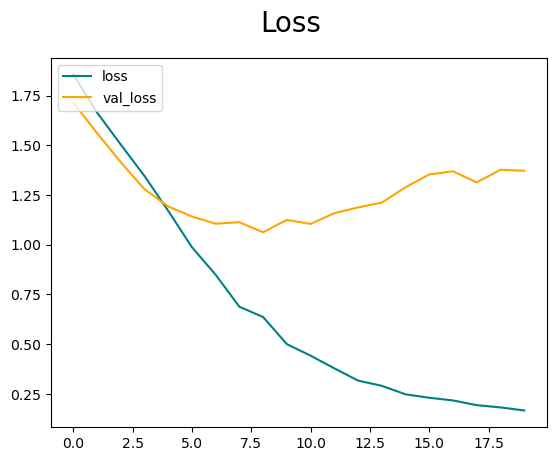

In [8]:
fig=plt.figure()
print(hist.history['val_loss'].index(min(hist.history['val_loss'])))
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

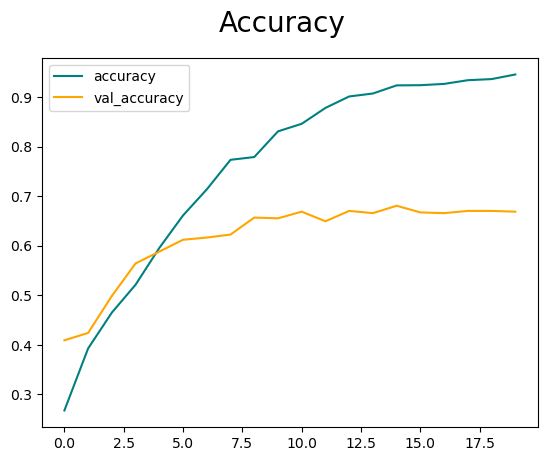

In [9]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [10]:
model.save(os.path.join('models','catdogclassifier.h5'))

/home/rishi/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
'''from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()'''

'from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy\npre=Precision()\nre=Recall()\nacc=BinaryAccuracy()'

In [12]:
'''for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
print('Precision:',pre.result().numpy(),'Recall:',re.result().numpy(),'Accuracy:',acc.result().numpy())'''

"for batch in test.as_numpy_iterator():\n    x,y=batch\n    yhat=model.predict(x)\n    pre.update_state(y,yhat)\n    re.update_state(y,yhat)\n    acc.update_state(y,yhat)\nprint('Precision:',pre.result().numpy(),'Recall:',re.result().numpy(),'Accuracy:',acc.result().numpy())"